In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#load data
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

df = pd.read_csv("/content/drive/MyDrive/adult.csv")
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [3]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
df.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [5]:
print(len(df))

48842


In [6]:
df.replace(to_replace="?", value=np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
print(len(df))

45222


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


2. Show all kind of plots( i.e: scatter, line , box , histogram) that might convey some information and write what you understood from the graphs in your colab file.

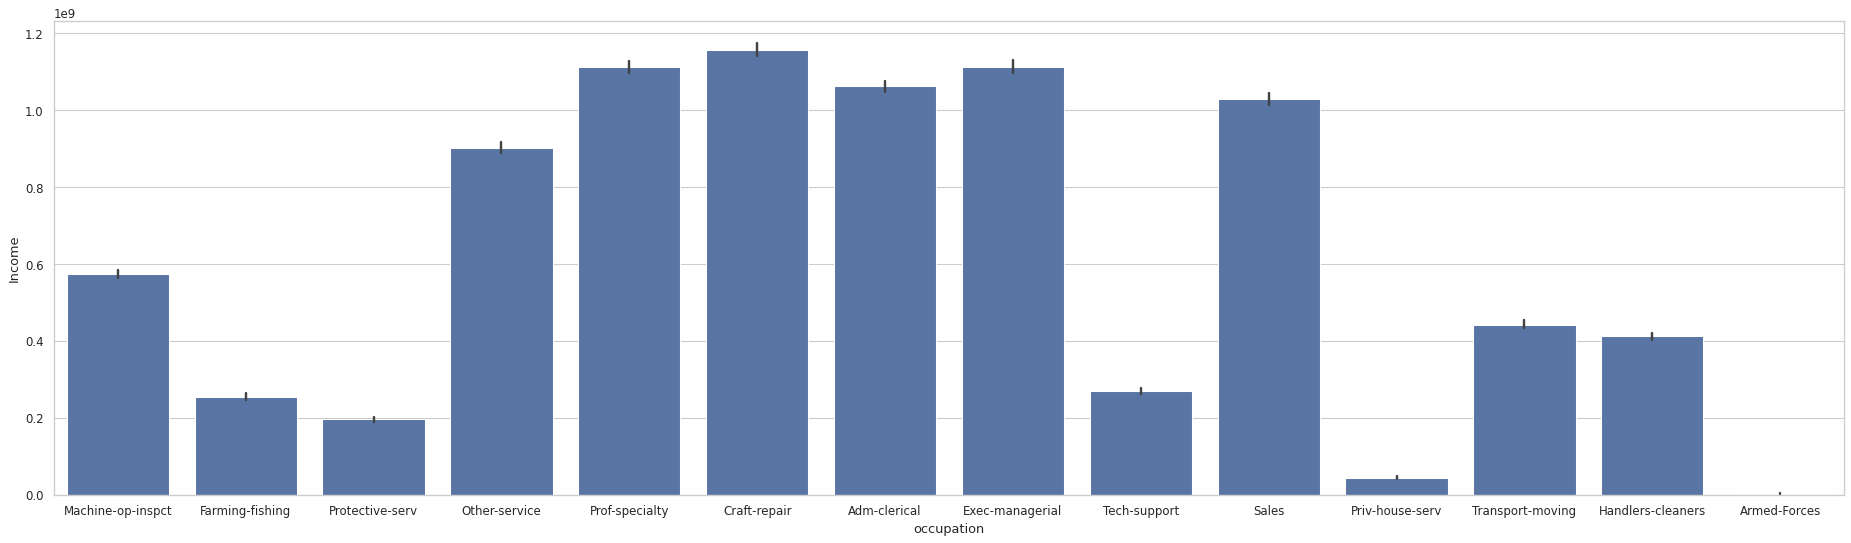

In [8]:
plt.figure(figsize=(30,8), dpi=77)
sns.barplot(df, x='occupation', y='fnlwgt',estimator='sum')
plt.ylabel('Income')
plt.show()

From the barplot, we are finding the total income of different occupation by using plotting. Here, the total income of Craft-repair is highest and lowest is Priv-house-serv.

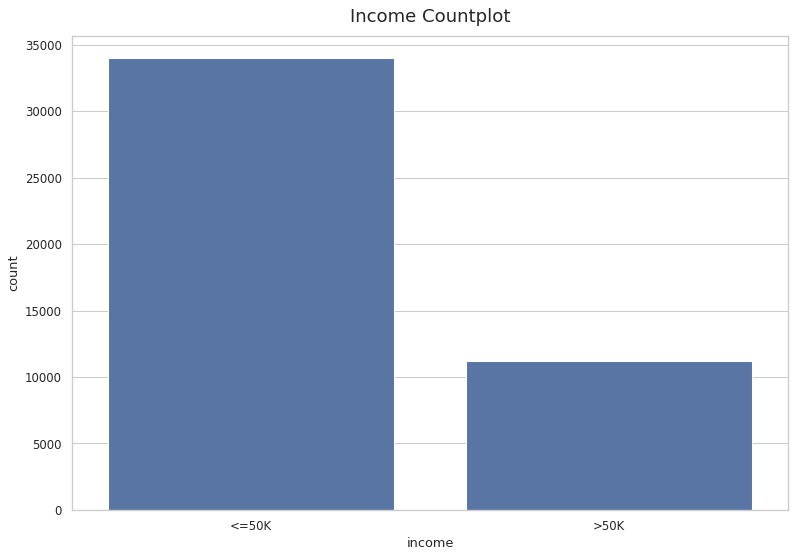

In [9]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(df, x="income")
plt.title("Income Countplot", size=17, pad=13)
plt.show()

From the countplot, we are finding count of income greater than and less then 50k.So here most of the income is less then 50k.

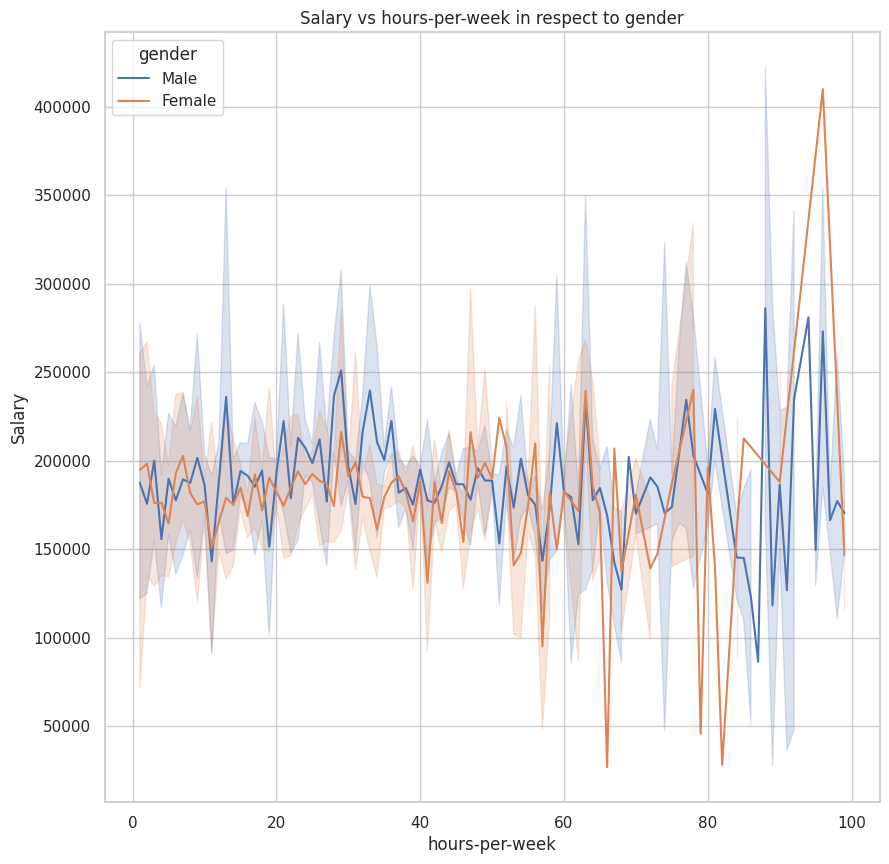

In [10]:
plt.figure(figsize=(10, 10),dpi=100)
sns.lineplot(data=df, x="hours-per-week", y="fnlwgt", hue='gender')
plt.title('Salary vs hours-per-week in respect to gender')
plt.ylabel('Salary')
plt.show()

From the line plot, We are finding the relation of income and hours per week with respect to gender. For both case income increases with the increase of hours-per-week.

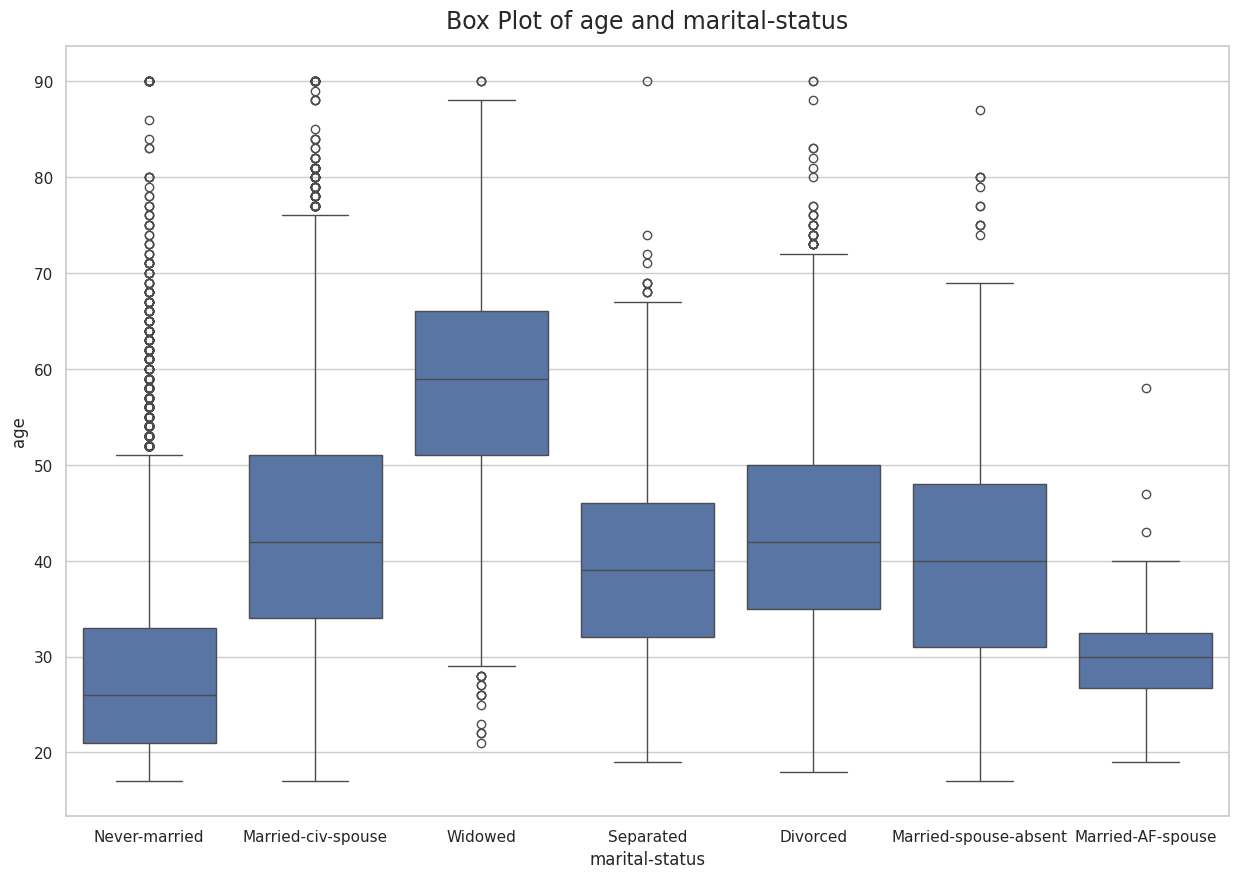

In [11]:
plt.figure(figsize=(15,10),dpi=100)
sns.boxplot(data=df, x='marital-status', y='age')
plt.title("Box Plot of age and marital-status",size=17,pad=13)
plt.show()


Here in boxplot,we have diffrent boxplot of different marital-status. The average income of widowed is more due to highest median. On the otherhand, the variation of age of Married-spouse-absent is more than other marital-status due to wide size of the box. The most overaged peoples are never-married peoples.Again, most underaged peoples are widowed.

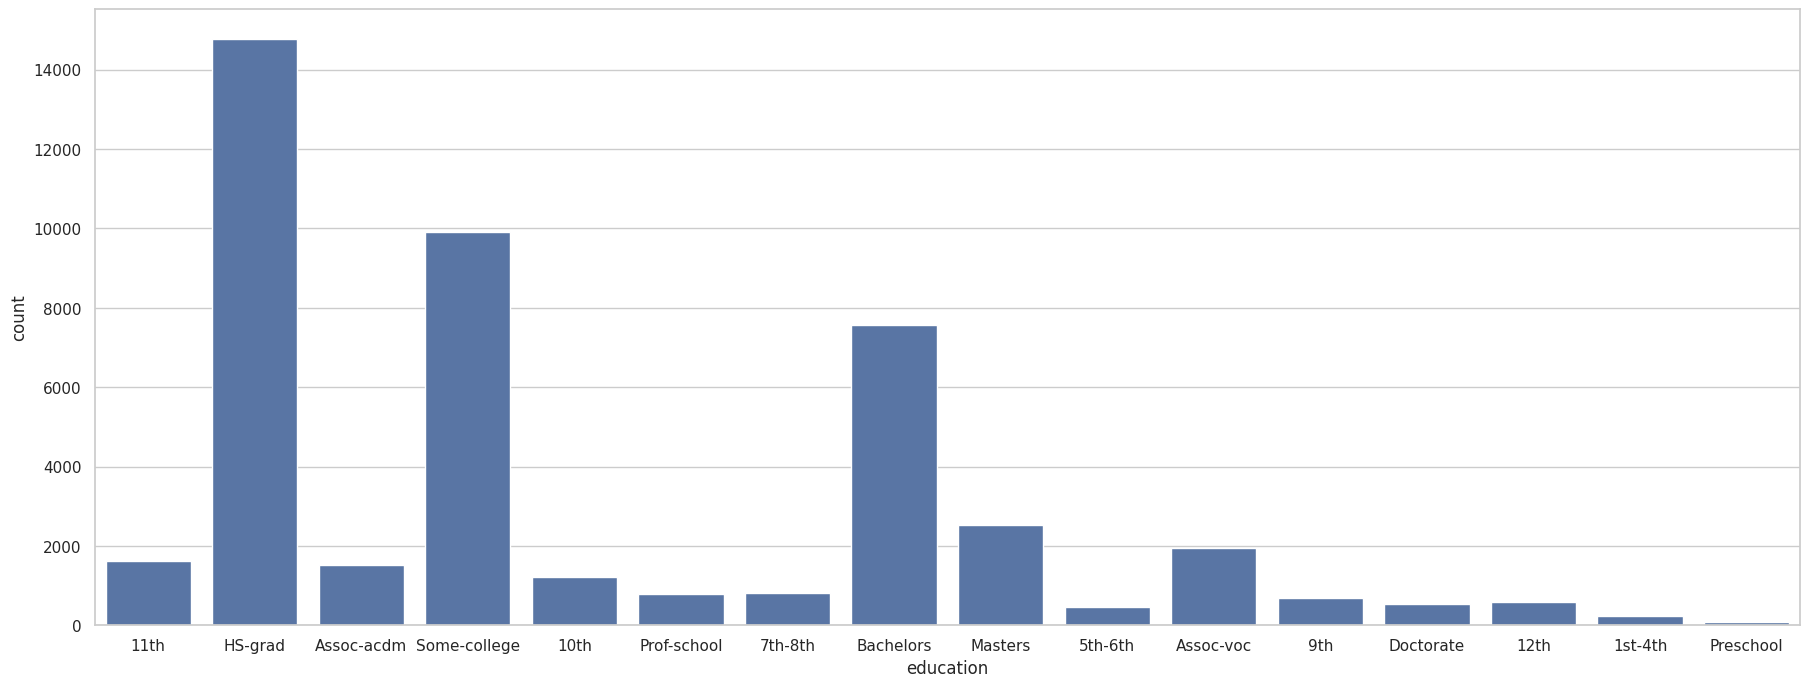

In [12]:
plt.figure(figsize=(22, 8),dpi=100)
sns.countplot(data=df, x='education')
plt.show()

From this graph most of the income came from education level with HS-grad. The lowest income came from Preschool level education.

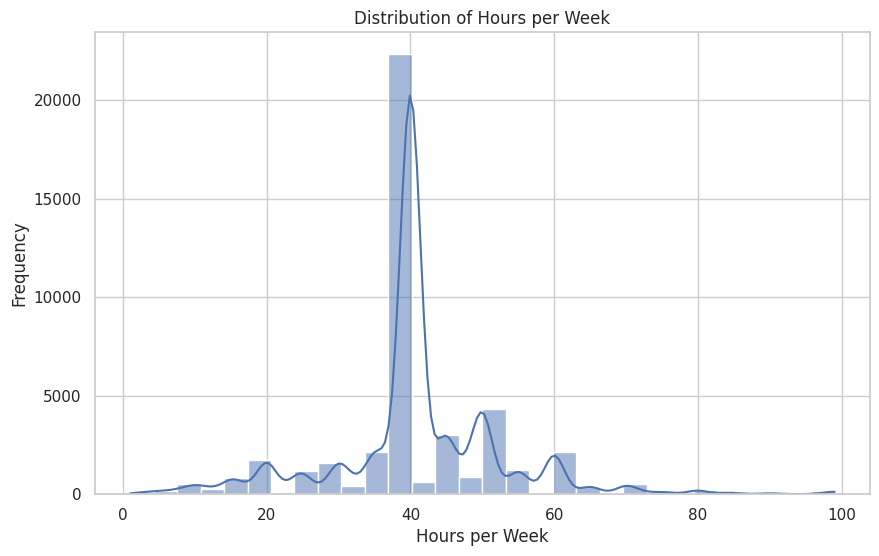

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True, bins=30)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

The above graph showing the histogram of the distribution of hours-per-week. From the histogram we find the hours-per-week is more distributed near 40.

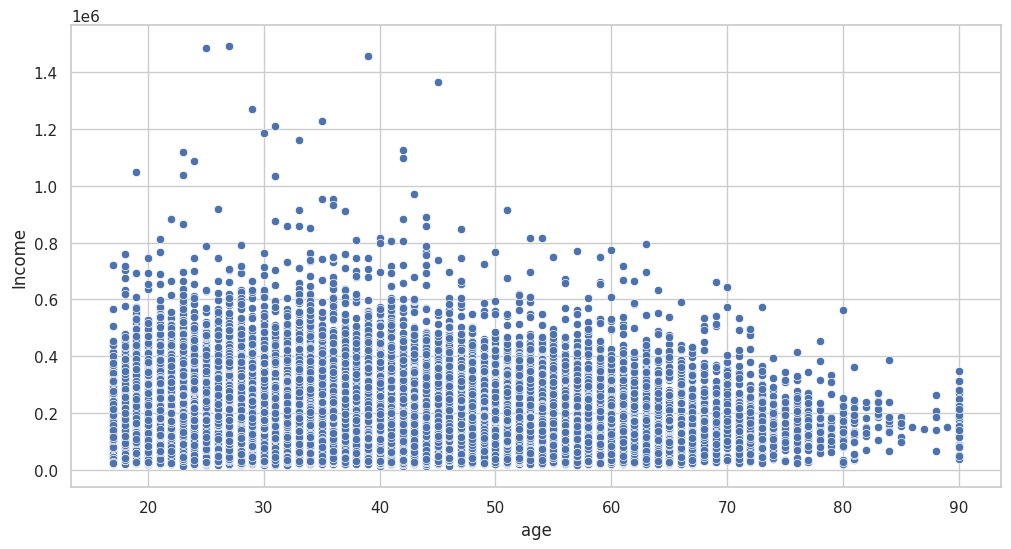

In [14]:
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(data=df, x="age", y="fnlwgt")
plt.title('')
plt.ylabel('Income')

plt.show()

From the scatter plot between fnlwgt and age, showing the relation beteeen age and income.So when age increases income rises which is between 20 to before 40 and after age of 40 income starts decreasing. There are many outliers values in the graph.

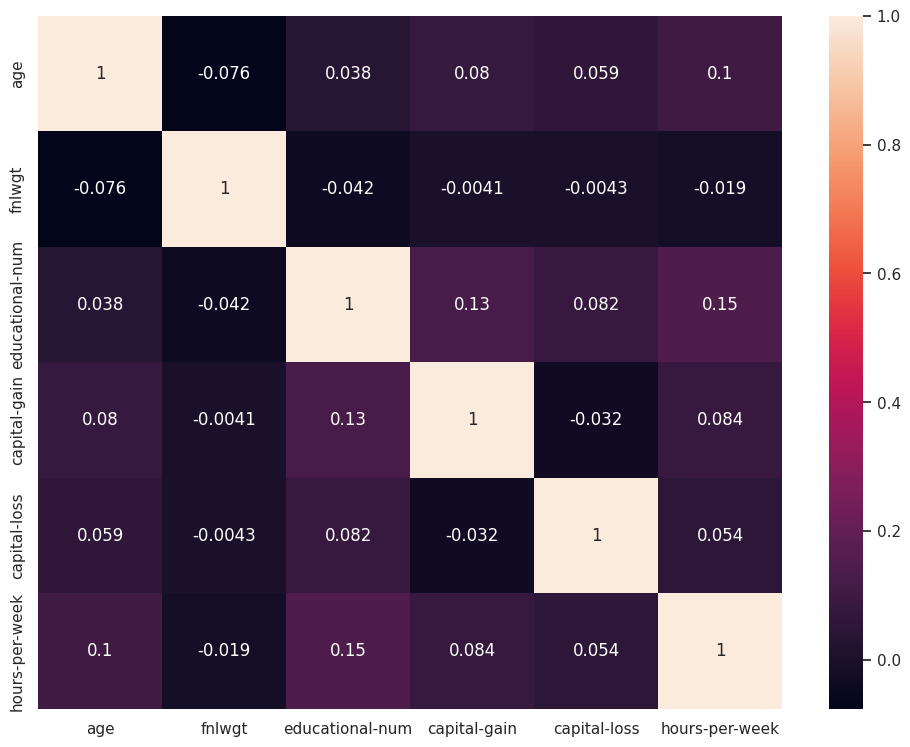

In [15]:
df_corr = df.astype("float64",errors='ignore')
df_corr = df_corr.select_dtypes(exclude="object")
plt.subplots(figsize=(12,9))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

From the heatmap, we understand the correlation between different attributes of our dataframes.We know that more positive correlated values are closer to 1. So from our graph, there are 9 positive corelated and 6 negative correlated attributes.Besides, the correlation between between same attribute is 1. As a result, we find the 6 correlated attributes with 1.